In [6]:
import numpy as np
import CommonFunctions as Cf
import matplotlib.pyplot as plt
import QuadrotorFlyModel as Qfm
import MemoryStore
D2R = Cf.D2R

In [2]:
x = np.array([[1,3,5], [3,5,7],[6,7,9]])

Quadrotor structure type StructureType.quad_x
Quadrotor get reward: 0.07326440885809381


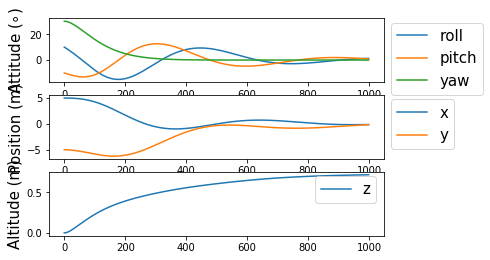

In [7]:
uavPara = Qfm.QuadParas(structure_type=Qfm.StructureType.quad_x)
simPara = Qfm.QuadSimOpt(init_mode=Qfm.SimInitType.fixed, enable_sensor_sys=False,
                     init_att=np.array([10., -10., 30]), init_pos=np.array([5, -5, 0]))
quad1 = Qfm.QuadModel(uavPara, simPara)
record = MemoryStore.DataRecord()
record.clear()
step_cnt = 0
for i in range(1000):
    ref = np.array([0., 0., 1., 0.])
    stateTemp = quad1.observe()
    action2, oil = quad1.get_controller_pid(stateTemp, ref)
#     print('action: ', action2)
    action2 = np.clip(action2, 0.1, 0.9)
    quad1.step(action2)
    record.buffer_append((stateTemp, action2))
    step_cnt = step_cnt + 1
record.episode_append()

print('Quadrotor structure type', quad1.uavPara.structureType)
# quad1.reset_states()
print('Quadrotor get reward:', quad1.get_reward())
data = record.get_episode_buffer()
bs = data[0]
ba = data[1]
t = range(0, record.count)
# mpl.style.use('seaborn')
fig1 = plt.figure(1)
plt.clf()
plt.subplot(3, 1, 1)
plt.plot(t, bs[t, 6] / D2R, label='roll')
plt.plot(t, bs[t, 7] / D2R, label='pitch')
plt.plot(t, bs[t, 8] / D2R, label='yaw')
plt.ylabel('Attitude $(\circ)$', fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1.05))
plt.subplot(3, 1, 2)
plt.plot(t, bs[t, 0], label='x')
plt.plot(t, bs[t, 1], label='y')
plt.ylabel('Position (m)', fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1.05))
plt.subplot(3, 1, 3)
plt.plot(t, bs[t, 2], label='z')
plt.ylabel('Altitude (m)', fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1.05))
plt.show()

In [9]:
v_img = 400
h_img = 400
ax_img_arr = np.zeros([v_img * h_img, 3])
for i in range(v_img):
    for j in range(h_img):
        ax_img_arr[i*h_img + j, :] = [i, j, 1]
ax_img = ax_img_arr.reshape([v_img, h_img, 3])

In [10]:
# 单位是mm,
ksx = 4 / v_img
ksy = 4 / h_img
sx0 = 2
sy0 = 2
# 焦距，单位mm
focal = 2.36

att_cam = bs[100, 6:9]
# z的位置单位是m
pos = bs[100, 0:3] * 1000

m_img2sensor = np.array([[ksx, 0, sx0],
                     [0, -ksy, -sy0],
                     [0, 0, 1]])
m_sensor2cam = np.array([[pos[2] / focal, 0, 0],
                        [0, pos[2] / focal, 0],
                         [0, 0, 1]])
m_cam2world = Cf.get_rotation_matrix(att_cam)
m_cam2world[0:2, 2] = pos[0:2]
m_cam2world[2, :] = np.array([0, 0, 1])
m_trans = m_cam2world.dot(m_sensor2cam.dot(m_img2sensor))
ax_real = m_trans.dot(ax_img_arr.transpose()).transpose()


In [48]:
img_res = np.zeros([v_img, h_img, 3], dtype=np.uint8)

In [49]:
for i in range(v_img):
    for j in range(h_img):
        img_res[i, j, :] = im[int(ax_real[i*h_img + j, 0]), int(ax_real[i*h_img + j, 1]+10000), :]

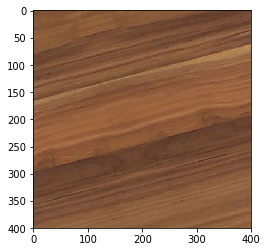

In [51]:
img3 = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)
plt.imshow(img3 / 255)

In [47]:
m_cam2world.dot(m_sensor2cam.dot(m_img2sensor))

array([[ 9.07997654e-01,  2.37344321e-01,  4.48104348e+03],
       [ 2.59496467e-01, -9.24790979e-01, -5.97606348e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [1]:
import cv2

In [2]:
im = cv2.imread('Data/groundImgWood.jpg')

In [4]:
import psutil
import os

In [29]:
print(u'内存使用：',psutil.Process(os.getpid()).memory_info().rss)

内存使用： 1328685056


In [60]:
ax_img_real = ax_real.reshape([v_img, h_img, 3])

In [55]:
att_cam

array([-0.13647458, -0.1990263 ,  0.27836947])